# **Announcement**
Unless you have any specific topic you would like to cover the rest of the lessons (this + 2 more) will be dedicated to this silly BotGame
- today: **object oriented programming** and definition of the problem
- next time: finishing the implementation of game and go over what **you will** need to develop for the final lesson
- last lesson: the **big fight**!! we'll be running a lot of simulations where each bot has a logic that each of you developed!! Winner gets *immortal glory*!

# Object Oriented Programming
> Object-oriented programming (OOP) is a programming paradigm based on the concept of "objects", which can contain data and code: data in the form of fields (often known as attributes or properties), and code, in the form of procedures (often known as methods). [Wikipedia](https://en.wikipedia.org/wiki/Object-oriented_programming)

This is a powerful but slightly advanced topic, for more information I strongly suggest to look into either of these references: 
- [py4e](https://www.py4e.com/lessons/Objects) 4 youtube videos describing **how to** use classes and corresponding written chapter
- [realpython](https://realpython.com/python3-object-oriented-programming/) article with code stippets

In this lesson we'll go get an overview and then focus on an example to show **why** it can be useful.

First, some nomenclature:
- **class**: think of it as the "cookie-cutter"/"blueprint"/"recipe" that generates *instances* ("cookie"/"building"/"food")
- **instance** (or **object**): this is the materialisation of the class and will be the one used in the program
- **method**: is a function that is attached to the class (and the instances that it creates), it must take at least one argument (conventionally named `self`) which is a reference to the instance.
- **attribute**: it's a variable that is attached to the class (and the instances that it creates), it can be called using the `.` notation.

One way to think of the use of a class is to think of it as a sub program, where everything within it only care about what's in the boundery. In this analogy `methods` are functions and `attributes` are variables.

There are some build-in *magic* methods (aka *dunder* methods) which get called when specific things happen, e.g.`__init__` gets called at initialisation of an object.

In [19]:
class Dog:                              # class (cookie-cutter)
    scientific_species = 'Canis lupus'  # class attribute (all instances automatically have the same value)
    
    def __init__(self, name):    # magic method
        self.name = name         # instance attribute (each instance will get a different name)
        
    def bark(self):              # method
        myname = self.name       # accessing instance attribute with `self`
        print(f"{myname}: woof")

        
mydog = Dog(name='fido')  # instance (actual cookie)
print(mydog.scientific_species)
mydog.bark()

print("="*20)

yourdog = Dog('dido')  # instance (actual cookie)
print(yourdog.scientific_species)
yourdog.bark()

Canis lupus
fido: woof
Canis lupus
dido: woof


# The Bot Race Game
We want to build a simple bot game. All bots are racing to get to square 10 as fast as possible but there are a few rules:
- Each turn a bot can either of the following actions: 
    - `walk` (move 1 square in the direction it is facing), 
    - or `sabotage` (making all the opponents at the same square turn in the opposite direction for one turn)
- The order of bot actions is randomised each round
- at the beginning of each round, all bots are turned to face forward
- bots cannot go further backwards than the starting position

In [23]:
class Bot:
    position = 0   # square at which the bot is located
    direction = 1  # can be 1 (facing forward) or -1 (facing backwards)
    
    def walk(self):
        self.position += self.direction   # walk in the current direction
        
    def sabotage(self, bots):
        pass # TODO: we'll implement this later

In [27]:
mybot = Bot()
print(mybot.position)

mybot.walk()
print(mybot.position)

mybot.walk()
print(mybot.position)

print(mybot)

0
1
2


## magic methods
Magic methods allow to overwrite default behaviour of the class, for example:
- \_\_init\_\_: gets called when the object/instance is initialised
- \_\_repr\_\_: gets called when a representation of the object is required, e.g.: `print(my_obj)`

Let's add a specific name for our bot at initialisation and a nice representation for it

In [28]:
class Bot:
    position = 0
    direction = 1
    
    def __init__(self, name):
        self.name = name           # adding a name attribute at initialisation to identify the bot

    def __repr__(self):
        return f"{self.name}Bot"   # returning a custom string representation

    def walk(self):
        from_position = self.position
        self.position = max(0, self.position+self.direction)    # making sure the position in never < 0
        to_position = self.position
        return from_position, to_position  # returning the from and to position so we can use display them if we want to

    def sabotage(self, bots):
        pass

In [31]:
mybot = Bot('Bit')

from_pos, to_pos = mybot.walk()
print(f"{mybot} moved from {from_pos} to {to_pos}")

from_pos, to_pos = mybot.walk()
print(f"{mybot} moved from {from_pos} to {to_pos}")

BitBot moved from 0 to 1
BitBot moved from 1 to 2


## listen all y'all it's a sabotage
Let's implement the sabotage action on the Bot

In [7]:
class Bot:
    position = 0
    direction = 1
    
    def __init__(self, name):
        self.name = name 

    def __repr__(self):
        return f"{self.name}Bot" 

    def walk(self):
        from_position = self.position
        self.position = max(0, self.position+self.direction) 
        to_position = self.position
        return from_position, to_position

    def sabotage(self, bots):  # this method will need the bots as a input so it can check and sabotage the ones that are in the same position
        sabotaged_bots = []   # keeping a list of all the bots we are sabotaging
        
        for bot in bots:                                       # going through every bot
            if bot.position == self.position and bot != self:  # if it in the same position and not myself..
                bot.direction = -1                             # sabotage it (turn it facing backwards)
                sabotaged_bots.append(bot)                     # add it to the bots I've sabotaged
                
        return sabotaged_bots                                  # return the list of sabotaged bots

In [8]:
evilbot = Bot('Evil')
walkingbot = Bot('Walking')
all_bots = [evilbot, walkingbot]
all_bots

[EvilBot, WalkingBot]

In [9]:
print("\n === FIRST ROUND: both walking ===")

from_pos, to_pos = walkingbot.walk()
print(f"{walkingbot} moved from {from_pos} to {to_pos}")

from_pos, to_pos = evilbot.walk()
print(f"{evilbot} moved from {from_pos} to {to_pos}")


 === FIRST ROUND: both walking ===
WalkingBot moved from 0 to 1
EvilBot moved from 0 to 1


In [10]:
print("\n === SECOND ROUND: evil stikes ===")

sabotaged = evilbot.sabotage(all_bots)
print(f"{evilbot} sabotaged {sabotaged}")

from_pos, to_pos = walkingbot.walk()
print(f"{walkingbot} moved from {from_pos} to {to_pos}")


 === SECOND ROUND: evil stikes ===
EvilBot sabotaged [WalkingBot]
WalkingBot moved from 1 to 0


# Strategy Hook
let's add the `play` method which is what will implement the strategy the bot will use, for now let's set it as just pick randomly between `move` and `sabotage`

In [11]:
import random 

class Bot:
    position = 0
    direction = 1
    
    def __init__(self, name):
        self.name = name 

    def __repr__(self):
        return f"{self.name}Bot" 

    def walk(self):
        from_position = self.position
        self.position = max(0, self.position+self.direction) 
        to_position = self.position
        return from_position, to_position

    def sabotage(self, bots):
        sabotaged_bots = [] 
        
        for bot in bots:
            if bot.position == self.position and bot != self:
                bot.direction = -1 
                sabotaged_bots.append(bot) 
        return sabotaged_bots 
    
    def play(self):                                   # when it's my turn to act... 
        return random.choice(['walk', 'sabotage'])    # ...randomly pick between 'walk' and 'sabotage'

In [18]:
bot = Bot("botty")
print(bot.play())
print(bot.play())
print(bot.play())
print(bot.play())

sabotage
walk
sabotage
walk


# Game object
now let's create a game class that will allow to handle the game, first let's allow the game to show a board

In [19]:
class Game:
    n_squares = 10   # defining size of the board
    
    def __init__(self, bots):    # the game will need to be initialised with a list of competitor bots
        self.bots = bots         # storing the list as an instance attribute so we can access it as `<game instance>.bots`

    def show_board(self):
        print("=" * 30)
        board = {i: [] for i in range(self.n_squares+1)}  # creating a dictionary of empty lists with numbers 0-10 as keys
        for bot in self.bots:
            board[bot.position] = bot      # adding the bot to the list corresponding to its position
            
        for square, bots_in_square in board.items():  # visualising the current positions
            print(f"{square}: {bots_in_square}")     

In [20]:
lonley_bot = Bot("Mr.Lonley")
competitors = [lonley_bot]
game = Game(competitors)
game.show_board()

0: Mr.LonleyBot
1: []
2: []
3: []
4: []
5: []
6: []
7: []
8: []
9: []
10: []


In [21]:
lonley_bot.walk()
lonley_bot.walk()
game.show_board()

0: []
1: []
2: Mr.LonleyBot
3: []
4: []
5: []
6: []
7: []
8: []
9: []
10: []


# \~\~\~ Question Break!! \~\~\~
![question_break](https://raw.githubusercontent.com/gabrielecalvo/Language4Water/master/assets/xx_question_break.jpg)

## Allowing Game to play rounds
We'll need to:
- setup an attribute `winner` which we'll use to check if race is over
- we'll then implement the `play_round` method which will:
    - randomise the order of call for each bot to act
    - let each bot play in that random order using another method called `_play_bot` (just to keep function smaller)
    - reset the direction of all bots at the end of each round so they are all facing forward
    - print out the current board status


The `_play_bot` method will take a single bot as input (the one that is playing at the moment) and need to:
- call the `play` method of the acting bot
- based on the action the acting bot is taking it will:
    - call the corresponding bot method
    - pass the necessary input
    - print out a line describing what the action and its effects were (just to better understand what's going on)
- if the bot has reach the end, we'll declare it the winner, which make the `play_round` method will stop the race

***NOTE***: starting a method name with `_` is just a convention to signal that the method should not be called directly but should only be called by another method withing the class.

In [22]:
import random 

class Game:
    n_squares = 10
    winner = None    # attribute that will be filled by the winner, we can use it to check if race is over
    
    def __init__(self, bots):   
        self.bots = bots              

    def show_board(self):
        print("=" * 30)
        board = {i: [] for i in range(self.n_squares+1)}
        for bot in self.bots:
            board[bot.position].append(bot)
            
        for square, bots_in_square in board.items():
            print(f"{square}: {bots_in_square}")     
            
    def play_round(self):
        if self.winner is None:        # if winner has not been declared yet, play a round
            random.shuffle(self.bots)  # randomise order of bots
            print(self.bots)           # print out the random order
                
            for bot in self.bots:      # for every bot in the random order
                self._play_bot(bot)    # have the bot play their move
                
                if self.winner:        # if the bot reaches the end and wins there is no need to continue
                    break
                    
            # reset directions after every bot has had their turn
            for bot in bots:
                bot.direction = 1

        if self.winner:      # if a winner was declared, show it
            print(f"========== Race Over, WINNER: {self.winner} ========== ")
        self.show_board()    # show the current status of the board
            
    def _play_bot(self, bot):        
        action_str = bot.play()  # action_str will be the string "walk" or "sabotage"
        
        if action_str == "walk":
            pos_from, pos_to = bot.walk()
            print(f"{bot} walked from {pos_from} to {pos_to}")
            
        elif action_str == "sabotage":
            sabotaged_bots = bot.sabotage(self.bots)
            print(f"{bot} sabotaged {sabotaged_bots}")
            
        if bot.position >= self.n_squares:
            self.winner = bot

In [23]:
bots = [Bot("Albatros"), Bot("Buffalo"), Bot("Cow")]
game = Game(bots)

In [26]:
game.show_board()

0: [AlbatrosBot, BuffaloBot, CowBot]
1: []
2: []
3: []
4: []
5: []
6: []
7: []
8: []
9: []
10: []


In [33]:
game.play_round()

[BuffaloBot, CowBot, AlbatrosBot]
BuffaloBot sabotaged [CowBot]
CowBot sabotaged [BuffaloBot]
AlbatrosBot walked from 2 to 3
0: []
1: [BuffaloBot, CowBot]
2: []
3: [AlbatrosBot]
4: []
5: []
6: []
7: []
8: []
9: []
10: []


# \~\~\~ Question Break!! \~\~\~
![question_break](https://raw.githubusercontent.com/gabrielecalvo/Language4Water/master/assets/xx_question_break.jpg)

## too chatty?
let's add a `verbose` attribute to the game which will skip the print statements if set to `False`.
This way it is easier to switch between debugging (finding mistakes) and just running to get the result

In [34]:
class Game:
    n_squares = 10 
    winner = None 
    
    def __init__(self, bots, verbose=False):   # adding `verbose` which will be False by default
        self.bots = bots
        self.verbose = verbose                 # storing it as an instance attribute

    def show_board(self):
        print("=" * 30)
        board = {i: [] for i in range(10)}
        for bot in self.bots:
            board[bot.position].append(bot)
            
        for square, bots_in_square in board.items():
            print(f"{square}: {bots_in_square}")     
            
    def play_round(self):
        if self.winner is None:
            random.shuffle(self.bots) 
            if self.verbose: 
                print(self.bots)    # only show the board if verbose=True
                
            for bot in self.bots:
                self._play_bot(bot) 
                if self.winner: 
                    break
                    
            for bot in bots:
                bot.direction = 1

        if self.verbose:     # only show the board if verbose=True
            if self.winner:
                print(f"========== Race Over, WINNER: {self.winner} ========== ")
            self.show_board()
            
    def _play_bot(self, bot):
        bot_position_dictionary = {b: b.position for b in self.bots}
        action_str = bot.play(bot_position_dictionary)
        
        if action_str == "walk":
            pos_from, pos_to = bot.walk()
            if self.verbose:   # only show the board if verbose=True
                print(f"{str(bot):<15} walked from {pos_from} to {pos_to}")
        elif action_str == "sabotage":
            sabotaged_bots = bot.sabotage(self.bots)
            if self.verbose:    # only show the board if verbose=True
                print(f"{str(bot):<15} sabotaged {sabotaged_bots}")
            
        if bot.position >= self.n_squares:
            self.winner = bot

***Note***: you might have noticed also the print lines in the `_play_bot` method now look like: 
```python 
print(f"{str(bot):<15} ...")
```

this is just so that we are aligining the names to the left of a 15 character string leaving the rest empty.
```
# so instead of ...
Mybot waked from 0 to 1
Myotherbot waked from 0 to 1

# ... we'll get
Mybot          waked from 0 to 1
Myotherbot     waked from 0 to 1
```

## Final Touches
Let's add a last couple of things:
- add a `_set_starting_positions` which will ensure all bots' position are 0 at the start of the Game (in the `__init__`)
- let's allow the bots to be smarter by passing all bots' position to the `.play` method so they can use that information to decide the move

In [144]:
import random
    
class Game:
    n_squares = 10
    winner = None

    def __init__(self, bots, verbose=False):
        self.bots = bots
        self.verbose = verbose

        self._set_starting_positions()  # calling the method that will reset all positions
        
    def _set_starting_positions(self):  
        for b in self.bots:  # go through every bot in the competition and set the position to 0
            b.position = 0
        
    def show_board(self):
        print("=" * 30)
        board = {i: [] for i in range(self.n_squares + 1)}
        for bot in self.bots:
            board[bot.position].append(bot)

        for square, bots_in_square in board.items():
            print(f"{square}: {bots_in_square}")

    def play_round(self):
        if self.winner is None:
            random.shuffle(self.bots)
            if self.verbose: 
                print(self.bots)
                
            for bot in self.bots:
                self._play_bot(bot)
                if self.winner:
                    break
                    
            for bot in bots:
                bot.direction = 1

        if self.verbose:
            if self.winner:
                print(f"========== Race Over, WINNER: {self.winner} ========== ")
            self.show_board()

    def _play_bot(self, bot):
        bot_position_dictionary = {b: b.position for b in self.bots}  # creating a dictionary of bot positions
        
        action_str = bot.play(bot_position_dictionary)                # passing it to the `play` method to allow the bot to make smarter decisions
        if action_str == "walk":
            pos_from, pos_to = bot.walk()
            if self.verbose: 
                print(f"{str(bot):<15} walked from {pos_from} to {pos_to}")
        elif action_str == "sabotage":
            sabotaged_bots = bot.sabotage(self.bots)
            if self.verbose: 
                print(f"{str(bot):<15} sabotaged {sabotaged_bots}")
            
        if bot.position >= self.n_squares:
            self.winner = bot
    
class Bot:
    position = 0
    direction = 1

    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"{self.name}Bot"

    def walk(self):
        from_position = self.position
        self.position = max(0, self.position+self.direction)
        to_position = self.position
        return from_position, to_position

    def sabotage(self, bots):
        sabotaged_bots = []
        for bot in bots:
            if bot.position == self.position and bot != self:
                bot.direction = -1
                sabotaged_bots.append(bot)
        return sabotaged_bots

    def play(self, bot_positions):  # added `bot_positions` as input, though we are currently still just picking randomly
        return random.choice(['walk', 'sabotage'])

# It's your Turn!!!
let's start simple, each of you send me a list of 'sabotage' and 'walk', let's have it with 12 elements

In [65]:
example_strategy = ['sabotage', 'sabotage', 'walk', 'sabotage', 'sabotage', 'walk', 'sabotage', 'sabotage', 'walk', 'sabotage', 'sabotage', 'walk']

duckduckgo_bot = Bot("DuckDuckGo")
def duckduckgo_play(*a,**kw):
    return example_strategy.pop(0)

In [118]:
strategies = {
    'Alena': ['walk', 'walk', 'sabotage', 'walk', 'walk', 'sabotage', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk']*2,
    'Aubrey': ['walk', 'walk', 'walk', 'sabotage', 'walk', 'walk', 'walk', 'sabotage', 'walk', 'walk', 'walk', 'sabotage']*2,
    'Iacopo': ['walk', 'sabotage', 'walk', 'walk', 'walk', 'walk', 'sabotage', 'sabotage', 'walk', 'walk', 'walk', 'walk']*2,
    'Robert': ['walk', 'sabotage', 'sabotage', 'sabotage', 'sabotage', 'walk', 'walk', 'walk', 'walk', 'sabotage', 'sabotage', 'walk']*2,
}

bots = []
for name, strategy_list in strategies.items():
    b = Bot(name, strategy_list)
    print(name, strategy_list.count("walk"))
    bots.append(b)
    
game = Game(bots, verbose=True)

Alena 20
Aubrey 18
Iacopo 18
Robert 12


In [141]:
game.play_round()

========== Race Over, WINNER: IacopoBot ========== 
0: []
1: []
2: []
3: []
4: [RobertBot, AlenaBot]
5: []
6: []
7: [AubreyBot]
8: []
9: []
10: [IacopoBot]


## Defining a barely-smart Bot Strategy
We'll be using what is called `Class Inheritance`

In [148]:
class BarelySmartBot(Bot):           # defining a new class which *inherits* all methods and attributes from the Bot class
    def play(self, bot_positions):   # re-defining (overwriting) the `play` method to impement the new strategy
        n_same_position = 0
        for pos in bot_positions.values():
            if pos == self.position:
                n_same_position+=1
        
        if n_same_position > 2:
            return "sabotage"
        else:
            return "walk"

and let's play!!!

In [192]:
bots = [Bot('Dummy1'), Bot('Dummy2'), Bot('Dummy3')]#, BarelySmartBot("BarelySmart")]
game = Game(bots, verbose=True)

In [189]:
game.play_round()

========== Race Over, WINNER: BarelySmartBot ========== 
0: []
1: []
2: []
3: [Dummy3Bot, Dummy1Bot]
4: [Dummy2Bot]
5: []
6: []
7: []
8: []
9: []
10: [BarelySmartBot]


# The Grand Prix

In [ ]:
# !pip install tqdm ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:>

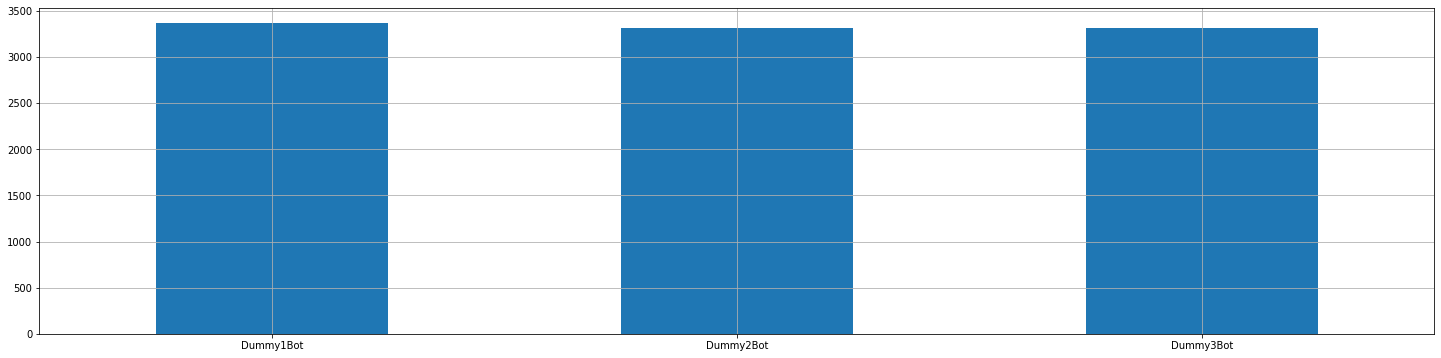

In [193]:
from tqdm.auto import tqdm
import pandas as pd

def grand_prix(n=1000):
    winnings = {b: 0 for b in bots}
    for _ in tqdm(range(n)):
        game = Game(bots, verbose=False)
        while game.winner is None:
            game.play_round()
        winnings[game.winner] += 1
        
    return winnings

winnings = grand_prix(n=10_000)
podium = pd.Series(winnings).sort_values(ascending=False)
podium.plot.bar(grid=True, figsize=(25,6), rot=0)